<center><h1 style="font-size:24px;">TCC - CIÊNCIA DE DADOS E BIG DATA</h1></center>
<center><h1 style="font-size:24px;">CATEGORIZAÇÃO DE PRODUTOS - DATASET DA OLIST</h1></center>

__Nome da aluna__: Mariana Silva Costa  
__Matrícula__: 1162946  
__Telefone__: (21) 9 8862-6509  
__E-mail__: 1358597@sga.pucminas.br

**1. IMPORTAÇÃO DE BIBLIOTECAS**

In [2]:
# Importando bibliotecas básicas
import pandas as pd   #processamento de dados
from ydata_profiling import ProfileReport #análise de dados
import numpy as np   #álgebra linear
import seaborn as sns #visualização baseada em matplotlib
sns.set_style("white") #gráficos sem grade
import matplotlib.pyplot as plt #biblioteca base de visualização
n = '\033[1m' #codificação de fonte em negrito
r = '\033[22m' #redefenir a formatação em negrito

In [3]:
# Importando a biblioteca scikit-learn e xgboost
# Algoritimos de aprendizado de máquina, pré-processamento, seleção de modelos, métricas de desempenho, ...
from sklearn.model_selection import KFold, cross_validate, cross_val_score, train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

In [4]:
# Importando a biblioteca scikit-optimize
# Utilizada para Otimização Bayesiana de hiper parâmetros
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

**2. COLETA DE DADOS**

In [5]:
# Importando os datasets de produtos e itens da Olist
path = 'C://Users//user//Desktop//Pos_Ciencia_de_Dados\//TCC//Projeto'
products_df = pd.read_csv(f'{path}//olist_products_dataset.csv')
items_df = pd.read_csv(f'{path}//olist_order_items_dataset.csv')

In [6]:
# Criando um dataframe compilado
df = products_df
df = pd.merge(df, items_df,  how='left', on='product_id')
df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

                           order_id  order_item_id  \
0  e17e4f88e31525f7deef66779844ddce              1   
1  5236307716393b7114b53ee991f36956              1   
2  01f66e58769f84129811d43eefd187fb              1   
3  143d00a4f2dde4e0364ee1821577adb3              1   
4  86cafb8794cb99a9b1b77fc8e48fbbbb              1   

                          seller_id  shipping_limit_date   price  \
0  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-30 17:33:54   10.91   
1  b561927807645834b59ef0d16ba55a24  2018-02-06 19:11:15  248.00   
2  7b07b3c7487f0ea825fc6df75abd658b  2018-07-11 21:30:20   79.80   
3  c510bc1718f0f2961eaa42a23330681a  2018-08-07 09:10:13  112.30   
4  0be8ff43f22e456b4e0371b2245e4d01  2018-04-17 01:30:23   37.90   

   freight_value  
0           7.39  
1          17.99  
2           7.82  
3           9.54  
4           8.29

**3. PROCESSAMENTO/TRATAMENTO DE DADOS**

In [7]:
# Análises do dataframe compilado
profile = ProfileReport(df, title="Análise do dataframe compilado")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Exportando a análise
profile.to_file("Relatorio_base.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Visualizando os tipos de colunas
df.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
order_id                       object
order_item_id                   int64
seller_id                      object
shipping_limit_date            object
price                         float64
freight_value                 float64
dtype: object

In [10]:
# Calculando os valores ausentes por colunas
df.isnull().sum()

product_id                       0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [11]:
# Eliminando duplicadas da coluna chave (product_id)
df = df.drop_duplicates('product_id')
# Eliminando linhas que contém elementos nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
 9   order_id                    32340 non-null  object 
 10  order_item_id               32340 non-null  int64  
 11  seller_id                   32340 non-null  object 
 12  shipping_limit_date         32340 non-null  object 
 13  price                       32

In [12]:
# Convertendo a unidade de peso de grama para quilo
df['product_weight_g'] = df['product_weight_g'].apply(lambda x: x/1000)
df = df.rename(columns={'product_weight_g': 'product_weight_kg'})

In [13]:
# Indentificando a quantidade de produtos em cada categoria
df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [14]:
# Criando um dataframe enxuto
df1 = df
df1.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'order_id', 'order_item_id', 'seller_id', 'shipping_limit_date', 'freight_value'], inplace=True)

# Filtrando apenas 2 categorias de produtos
df1 = df1[(df1['product_category_name'] == 'cama_mesa_banho') | (df1['product_category_name'] == 'beleza_saude')]

# Transformando a coluna de categoria em tipo numérico
df1 = df1.replace({'cama_mesa_banho':0, 'beleza_saude':1})

# Simplificando os nomes das colunas no português
df1.rename(columns={'product_category_name':'categoria', 'product_weight_kg':'peso_kg', 'product_length_cm':'comprimento_cm', 'product_height_cm':'altura_cm', 'product_width_cm':'largura_cm', 'price':'preco'}, inplace=True)
display(df1)

product_id  categoria  peso_kg  comprimento_cm  \
19      14aa47b7fe5c25522b47b4b29c98dcb9          0    1.100            16.0   
34      f53103a77d9cf245e579ea37e5ec51f0          0    0.500            16.0   
39      518ef5de2c2b3a255e326a4594ba15d9          0    0.800            36.0   
40      e3e020af31d4d89d2602272b315c3f6e          1    0.075            21.0   
60      47859fca9dd7485cbd93c3e8993bb74f          0    0.650            16.0   
...                                  ...        ...      ...             ...   
112531  c1cf541d5b33a4b04ddc1c3be7aa1c86          1    0.150            35.0   
112547  5bde14b0ba42a788655c3ebf4ba54597          0    1.500            31.0   
112574  dfec64aac9b864b2807a7be33222b75f          0    0.850            38.0   
112637  9a7c6041fa9592d9d9ef6cfe62a71f8c          0    1.400            27.0   
112649  106392145fca363410d287a815be6de4          0    2.083            12.0   

        altura_cm  largura_cm   preco  
19           10.0        16.0   71.99  
34           10.0        16.0   41.99  
39            8.0        16.0  145.00  
40            7.0        13.0   29.90  
60           10.0        16.0   41.99  
...           ...         ...     ...  
112531        2.0        26.0   38.00  
112547       21.0        26.0   75.61  
112574        7.0        28.0   84.90  
112637        7.0        27.0  127.00  
112649        2.0         7.0  107.50  

[5473 rows x 7 columns]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Boxplot das variáveis analisadas


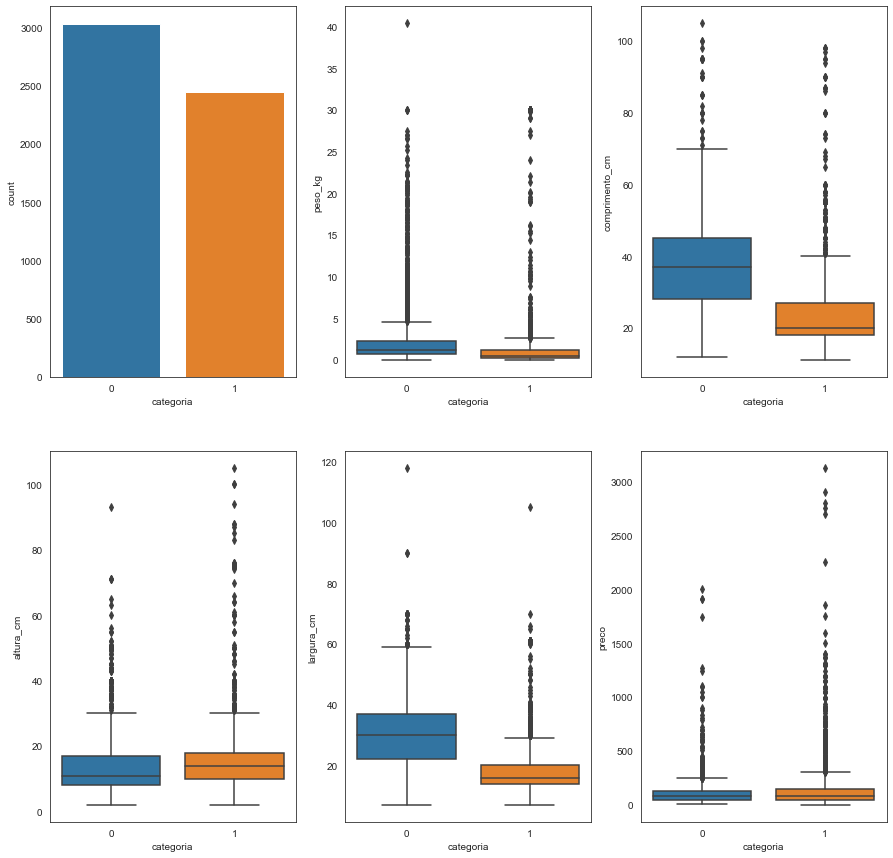

In [15]:
# Plotando as variáveis
fig = plt.figure(figsize=(15, 15))
# Gráfico 1 - Barras de contagem 
fig.add_subplot(231) 
sns.countplot(df1['categoria'])
# Gráfico 2 - Boxplot de peso
fig.add_subplot(232) 
sns.boxplot(data=df1, x='categoria', y='peso_kg')
# Gráfico 2 - Boxplot de comprimento
fig.add_subplot(233) 
sns.boxplot(data=df1, x='categoria', y='comprimento_cm')
# Gráfico 3 - Boxplot de altura
fig.add_subplot(234) 
sns.boxplot(data=df1, x='categoria', y='altura_cm')
# Gráfico 4 - Boxplot de largura
fig.add_subplot(235) 
sns.boxplot(data=df1, x='categoria', y='largura_cm')
# Gráfico 4 - Boxplot de preço 
fig.add_subplot(236) 
sns.boxplot(data=df1, x='categoria', y='preco')
print(f'{n}Boxplot das variáveis analisadas')
plt.show()

In [16]:
# Removendo outliers das variáveis
peso_q95 = df1['peso_kg'].quantile(0.95)
df1 = df1[df1['peso_kg'] < peso_q95]
comprimento_q95 = df1['comprimento_cm'].quantile(0.95)
df1 = df1[df1['comprimento_cm'] < comprimento_q95]
altura_q95 = df1['altura_cm'].quantile(0.95)
df1 = df1[df1['altura_cm'] < altura_q95]
largura_q95 = df1['largura_cm'].quantile(0.95)
df1 = df1[df1['largura_cm'] < largura_q95]
preco_q95 = df1['preco'].quantile(0.95)
df1 = df1[df1['preco'] < preco_q95]

# Verificando como ficou o dataframe
df1.info()
df1.categoria.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4062 entries, 19 to 112649
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      4062 non-null   object 
 1   categoria       4062 non-null   int64  
 2   peso_kg         4062 non-null   float64
 3   comprimento_cm  4062 non-null   float64
 4   altura_cm       4062 non-null   float64
 5   largura_cm      4062 non-null   float64
 6   preco           4062 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 253.9+ KB


0    2035
1    2027
Name: categoria, dtype: int64

**Normalização - Redimensionamento / Scaler**

In [17]:
# Criando um dataframe apenas com as colunas numéricas e categoria
numeric_df = df1.drop(['product_id'],axis=1)
# Criando o scaler
scaler = RobustScaler()
# Fazendo o fit com os dados
scaler = scaler.fit(numeric_df[['peso_kg']])
scaler = scaler.fit(numeric_df[['comprimento_cm']])
scaler = scaler.fit(numeric_df[['altura_cm']])
scaler = scaler.fit(numeric_df[['largura_cm']])
scaler = scaler.fit(numeric_df[['preco']])
# Fazendo a transformação e criando columns_robust
numeric_df['peso_kg_robust'] = scaler.transform(numeric_df[['peso_kg']])
numeric_df['comprimento_cm_robust'] = scaler.transform(numeric_df[['comprimento_cm']])
numeric_df['altura_cm_robust'] = scaler.transform(numeric_df[['altura_cm']])
numeric_df['largura_cm_robust'] = scaler.transform(numeric_df[['largura_cm']])
numeric_df['preco_robust'] = scaler.transform(numeric_df[['preco']])
# Visualizando novamente os dados
numeric_df.describe()

categoria      peso_kg  comprimento_cm    altura_cm   largura_cm  \
count  4062.000000  4062.000000     4062.000000  4062.000000  4062.000000   
mean      0.499015     1.031411       26.968735    12.104874    21.491876   
std       0.500061     0.952122        9.794704     5.904421     8.000819   
min       0.000000     0.000000       11.000000     2.000000     7.000000   
25%       0.000000     0.350000       18.000000     8.000000    15.000000   
50%       0.000000     0.750000       25.000000    11.000000    19.000000   
75%       1.000000     1.400000       35.000000    16.000000    29.000000   
max       1.000000     6.900000       49.000000    29.000000    38.000000   

             preco  peso_kg_robust  comprimento_cm_robust  altura_cm_robust  \
count  4062.000000     4062.000000            4062.000000       4062.000000   
mean     83.042307       -0.953077              -0.588840         -0.797572   
std      55.369757        0.013371               0.137547          0.082916   
min       1.200000       -0.967561              -0.813088         -0.939475   
25%      39.990000       -0.962646              -0.714787         -0.855217   
50%      68.900000       -0.957029              -0.616486         -0.813088   
75%     111.200000       -0.947901              -0.476057         -0.742873   
max     270.000000       -0.870664              -0.279455         -0.560315   

       largura_cm_robust  preco_robust  
count        4062.000000   4062.000000  
mean           -0.665751      0.198600  
std             0.112355      0.777556  
min            -0.869260     -0.950709  
25%            -0.756916     -0.405982  
50%            -0.700744      0.000000  
75%            -0.560315      0.594018  
max            -0.433928      2.824042

**4. ANÁLISE E EXPLORAÇÃO DOS DADOS**

In [18]:
# Analisando as informações estatísticas do df1-cama_mesa_banho
print(f'{n}Informações Estatísticas da categoria cama, mesa e banho:')
cmb = pd.DataFrame(data=df1)
cmb.loc[cmb['categoria'] == 0].describe().round(2)

Informações Estatísticas da categoria cama, mesa e banho:


categoria  peso_kg  comprimento_cm  altura_cm  largura_cm    preco
count     2035.0  2035.00         2035.00    2035.00     2035.00  2035.00
mean         0.0     1.30           32.28      11.04       26.37    81.70
std          0.0     0.99            9.99       5.64        7.76    52.40
min          0.0     0.00           12.00       2.00        7.00     6.99
25%          0.0     0.60           25.00       7.00       20.00    42.90
50%          0.0     1.05           35.00      10.00       28.00    68.50
75%          0.0     1.66           40.00      15.00       34.00   109.90
max          0.0     6.75           49.00      29.00       38.00   270.00

In [19]:
# Analisando as informações estatísticas do df1-beleza_saude
print(f'{n}Informações Estatísticas da categoria beleza e saúde:')
bs = pd.DataFrame(data=df1)
bs.loc[bs['categoria'] == 1].describe().round(2)

Informações Estatísticas da categoria beleza e saúde:


categoria  peso_kg  comprimento_cm  altura_cm  largura_cm    preco
count     2027.0  2027.00         2027.00    2027.00     2027.00  2027.00
mean         1.0     0.76           21.64      13.18       16.59    84.39
std          0.0     0.83            5.94       5.97        4.45    58.18
min          1.0     0.05           11.00       2.00        7.00     1.20
25%          1.0     0.25           17.00       9.00       14.00    39.75
50%          1.0     0.44           20.00      13.00       16.00    68.90
75%          1.0     1.03           25.00      17.00       19.00   116.94
max          1.0     6.90           48.00      29.00       38.00   269.90

In [20]:
# Criando um dataframe apenas com as colunas robust e categoria
robust_df = numeric_df.drop(['peso_kg', 'comprimento_cm', 'altura_cm', 'largura_cm', 'preco'], axis=1)

In [21]:
# Calculando a correlação emparelhada de colunas
corr = robust_df.corr()

Mapa de Correlação


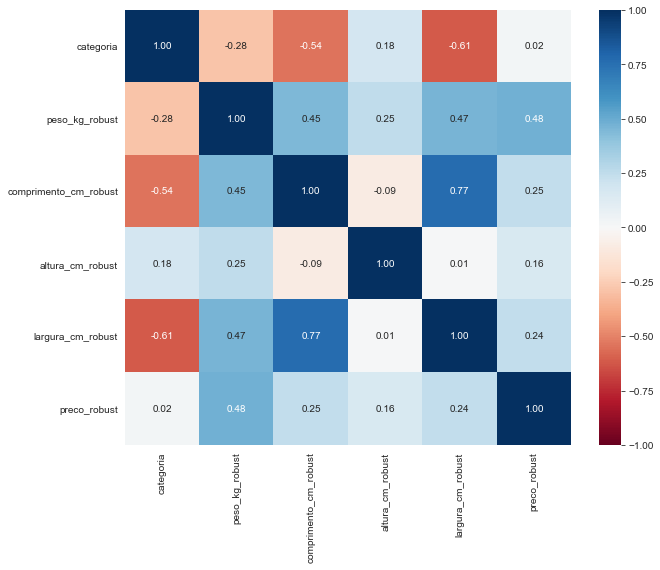

In [22]:
# Plotando um Mapa de Correlação das robust_columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', norm=plt.Normalize(-1,1), annot=True, fmt='.2f')
print(f'{n}Mapa de Correlação')
plt.show()

Pairplot das colunas numéricas


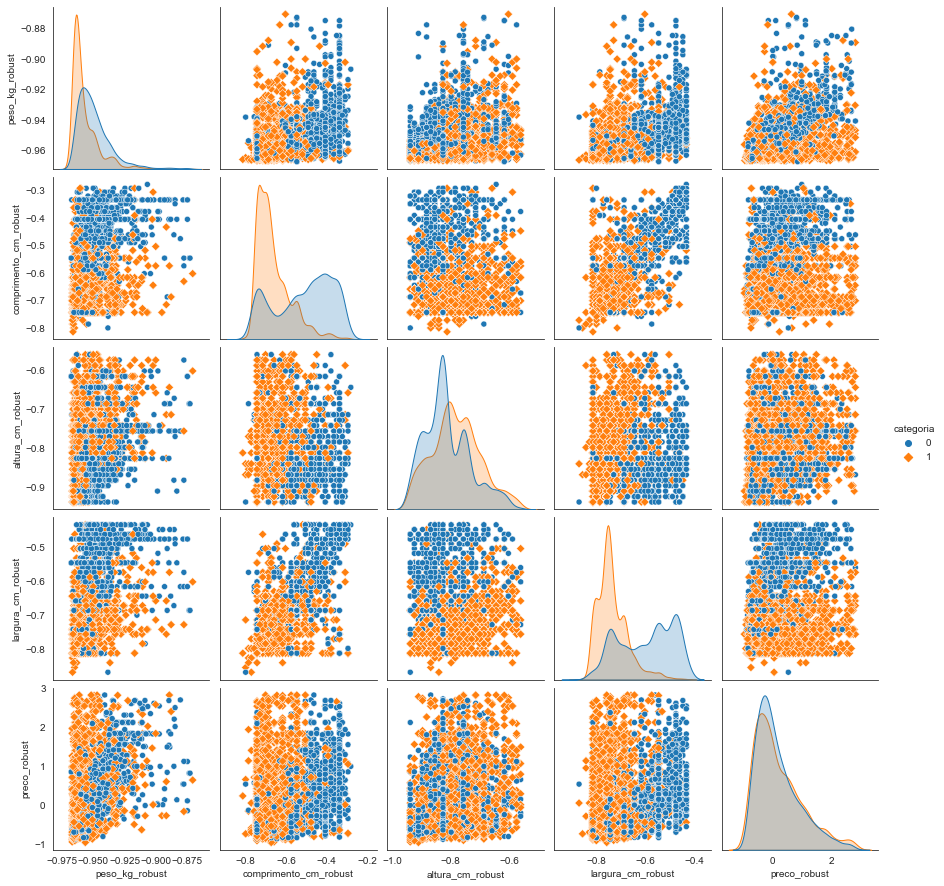

In [23]:
# Pairplot das robust_columns
sns.pairplot(robust_df, hue="categoria", markers=["o", "D"])
print(f"{n}Pairplot das colunas numéricas")
plt.show()

**5. CRIAÇÃO E AVALIAÇÃO DE MODELOS DE MACHINE LEARNING**

**5.1 TREINAMENTO DO MODELO**

In [24]:
# Separando X e y
X = robust_df.drop(['categoria'],axis=1)
y = robust_df.categoria

In [25]:
# Selecionando os conjuntos de treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
# Tamanhos de x e y de treino e de teste
X_train.shape, X_test.shape

((2843, 5), (1219, 5))

In [27]:
# Ajustes da validação cruzada sem otimização de hiper parâmetros
cv = KFold(n_splits=10,random_state=42,shuffle=True)

**I. Árvores de Decisão**

Sem Otimização de Hiper Parâmetros

In [28]:
# Criando o classificador
clf_dt = tree.DecisionTreeClassifier(random_state=1)
# Calculando a acurácia e o desvio padrão
score_dt = cross_val_score(clf_dt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('acuráia: %.2f | desvio padrão: %.3f' % (np.mean(score_dt)*100, np.std(score_dt)))

acuráia: 88.85 | desvio padrão: 0.013


Com Otimização Bayesiana

In [29]:
# Criando o classificador
clf_dt_tunado = tree.DecisionTreeClassifier(random_state=2)
# Fazendo o k-fold Cross-Validation
score_dt_tunado = cross_val_score(clf_dt_tunado, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
# Definindo o range de parâmetros
dt_search_space = {"criterion": Categorical(['gini','entropy']),
                   "splitter": Categorical(['best', 'random']),
                   "max_depth": Integer(3, 15),
                   "max_features": Categorical(['auto', 'sqrt', 'log2']),
                  }
# Fitando o Modelo e Medindo a Performance
dt_bayes_search = BayesSearchCV(clf_dt_tunado, dt_search_space, scoring='accuracy', cv=5)
dt_bayes_search.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user\anacon

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
              scoring='accuracy',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=3, high=15, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('auto', 'sqrt', 'log2'), prior=None),
                             'splitter': Categorical(categories=('best', 'random'), prior=None)})

In [30]:
# Configuração de parâmetro que deu os melhores resultados nos dados de espera
dt_bayes_search.best_params_

OrderedDict([('criterion', 'entropy'),
             ('max_depth', 12),
             ('max_features', 'auto'),
             ('splitter', 'best')])

In [31]:
# Estimador que deu maior pontuação ou menor perda nos dados deixados de fora
dt_bayes_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='auto',
                       random_state=2)

In [32]:
# Calculando a acurácia
print('acuráia: %.2f' % (np.mean(dt_bayes_search.best_score_)*100))

acuráia: 89.13


**II. Regressão Logística**

Sem Otimização de Hiperparâmetros

In [33]:
# Criando o classificador
clf_lr = LogisticRegression(random_state=3, max_iter=1000)
# Calculando a acurácia e o desvio padrão
score_lr = cross_val_score(clf_lr, X_train, y_train, scoring='accuracy', cv=cv)
print('acuráia: %.2f | desvio padrão: %.3f' % (np.mean(score_lr)*100, np.std(score_lr)))

acuráia: 80.44 | desvio padrão: 0.024


**III. Naive Bayes**

Sem Otimização de Hiperparâmetros

In [34]:
# Criando o classificador
clf_nb = GaussianNB()
# Calculando a acurácia e o desvio padrão
score_nb = cross_val_score(clf_nb, X_train, y_train, scoring='accuracy', cv=cv)
print('acuráia: %.2f | desvio padrão: %.3f' % (np.mean(score_nb)*100, np.std(score_nb)))

acuráia: 78.72 | desvio padrão: 0.026


**IV. XGBoost - Xtreme Gradient Boosting**

Sem Otimização de Hiperparâmetros

In [35]:
# Criando o classificador
clf_xgb = xgb.XGBClassifier(random_state=5)
# Calculando a acurácia e o desvio padrão
scores_xgb = cross_val_score(clf_xgb, X_train, y_train, scoring='accuracy', cv=cv)
print('acuráia: %.2f | desvio padrão: %.3f' % (np.mean(scores_xgb)*100, np.std(scores_xgb)))

acuráia: 92.72 | desvio padrão: 0.010


Com Otimização Bayesiana

In [36]:
# Criando o classificador
clf_xgb_tunado = xgb.XGBClassifier(random_state=6)
# Fazendo o k-fold Cross-Validation
score_xgb_tunado = cross_val_score(clf_xgb_tunado, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1).mean()
# Definindo o range de parâmetros
xgb_search_space = {"max_depth": Integer(1,15),
                    "min_child_weight": Integer(0, 3),
                    "subsample": Real(0.1, 1.0),
                    "colsample_bytree": Real(0.1, 1.0),
                   }
# Fitando o Modelo e Medindo a Performance
xgb_bayes_search = BayesSearchCV(clf_xgb_tunado, xgb_search_space, scoring='accuracy', cv=5)
xgb_bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                                      random_state=6, ...),
              scoring='accuracy',
              search_spaces={'colsample_bytree': Real(low=0.1, high=1.0, prior='uniform', transform='normalize'),
                            

In [37]:
# Configuração de parâmetro que deu os melhores resultados nos dados de espera
xgb_bayes_search.best_params_

OrderedDict([('colsample_bytree', 0.9998514672781296),
             ('max_depth', 5),
             ('min_child_weight', 0),
             ('subsample', 0.8249264182420988)])

In [38]:
# Estimador que deu maior pontuação ou menor perda nos dados deixados de fora
xgb_bayes_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9998514672781296, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=6, ...)

In [39]:
# Calculando a acurácia
print('acuráia: %.2f' % (np.mean(xgb_bayes_search.best_score_)*100))

acuráia: 92.51


**5.2 AVALIAÇÃO DO MODELO**

O MELHOR CLASSIFICADOR >> xgb_bayes_search.best_estimator_

In [40]:
# Realizando a predição da base de teste utilizando o melhor estimador encontrado
xgb_bayes_search.best_estimator_.fit(X_train, y_train)
y_pred = xgb_bayes_search.best_estimator_.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [41]:
# y de teste(real)
y_test[:10]

89763     1
67999     0
112574    0
20544     1
55134     0
13771     1
4522      0
71866     1
87444     0
101583    0
Name: categoria, dtype: int64

In [42]:
# Avaliação do modelo
total = len(y_test)
acertos = (y_pred == y_test).sum()
erros = total-acertos
accuracy = (100*acertos/total).round(2)
precision = (100*precision_score(y_test, y_pred)).round(2)
recall = (100*recall_score(y_test, y_pred)).round(2)
f1 = (100*f1_score(y_test, y_pred)).round(2)

print(f"{n}Avaliação do modelo\n{r}")
print("Tamanho total da base de teste:" +str(total)+ " produtos")
print("Acertos da predição: " +str(acertos)+ " produtos, ou seja, " +str((100*(acertos/total)).round(2))+ "%.")
print("Total de erros na predição: " +str(erros)+ " produtos, ou seja, " +str((100*(erros/total)).round(2))+ "%.\n")
# Acurácia: soma dos acertos, dividido pela soma de todos os resultados, que é também o número total de amostras.
print("Acurácia:", accuracy)
# Precisão: razão entre o número de verdadeiros positivos e o número total de previsões positivas feitas pelo modelo.
print("Precisão:", precision)
# Recall: razão entre o número de verdadeiros positivos e o número total de casos positivos.
print("Recall:", recall)
# F1 Score: média harmônica entre a precisão e o recall.
print("F1 Score:", f1)

Avaliação do modelo

Tamanho total da base de teste:1219 produtos
Acertos da predição: 1134 produtos, ou seja, 93.03%.
Total de erros na predição: 85 produtos, ou seja, 6.97%.

Acurácia: 93.03
Precisão: 94.06
Recall: 92.08
F1 Score: 93.06


In [43]:
# Visualizando onde a predição não foi correta.
X_test[y_test != y_pred]

peso_kg_robust  comprimento_cm_robust  altura_cm_robust  \
101583       -0.955624              -0.616486         -0.742873   
108137       -0.965454              -0.686701         -0.939475   
69084        -0.962646              -0.742873         -0.742873   
93137        -0.959837              -0.546272         -0.827131   
24823        -0.947901              -0.686701         -0.686701   
...                ...                    ...               ...   
79433        -0.963348              -0.532229         -0.883303   
91113        -0.959837              -0.742873         -0.827131   
62674        -0.963348              -0.686701         -0.827131   
21083        -0.959837              -0.742873         -0.686701   
58607        -0.938070              -0.756916         -0.714787   

        largura_cm_robust  preco_robust  
101583          -0.644572     -0.820110  
108137          -0.742873     -0.547676  
69084           -0.742873     -0.688106  
93137           -0.686701     -0.126387  
24823           -0.686701      0.014043  
...                   ...           ...  
79433           -0.532229     -0.209240  
91113           -0.742873      1.277910  
62674           -0.756916     -0.602584  
21083           -0.742873     -0.054768  
58607           -0.616486      0.577026  

[85 rows x 5 columns]

Matriz de Confusão


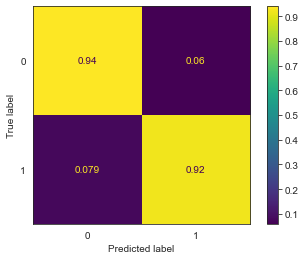

In [44]:
# Visualizando a matriz de confusão
cm = confusion_matrix(y_test,y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=xgb_bayes_search.best_estimator_.classes_)
print(f"{n}Matriz de Confusão")
disp.plot()
plt.show()